In [26]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

**Data Preparation**

In [29]:
train=pd.read_csv('/content/train.csv',nrows=10000)
extra_song = pd.read_csv('/content/song_extra_info.csv')
members = pd.read_csv('/content/members.csv')
songs=pd.read_csv('/content/songs.csv')

In [30]:
print("train:" ,train.shape)
train.head()

train: (10000, 6)


,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [31]:
print("members ",members.shape)
members.head()

members  (34403, 7)


,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [15]:
print("songs:",songs.shape)
songs.head()

songs: (686931, 7)


,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [32]:
merge1 = pd.merge(train, songs, on = 'song_id', how = 'left')
merge2 = pd.merge(merge1, extra_song, on = 'song_id', how = 'left')
music = pd.merge(merge2, members, on = 'msno', how = 'left')
del train, songs, extra_song, members, merge1, merge2
music.head()



,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,NaN,NaN,NaN,NaN,NaN,NaN,Good Grief,GBUM71602854,1,0,NaN,7,20120102,20171005
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,24,female,9,20110525,20170911
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,13,24,female,9,20110525,20170911
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,Disco Africa,GBUQH1000063,13,24,female,9,20110525,20170911
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003,1,0,NaN,7,20120102,20171005


In [33]:
music.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    10000 non-null  object 
 1   song_id                 10000 non-null  object 
 2   source_system_tab       9980 non-null   object 
 3   source_screen_name      9736 non-null   object 
 4   source_type             9980 non-null   object 
 5   target                  10000 non-null  int64  
 6   song_length             8794 non-null   float64
 7   genre_ids               8633 non-null   object 
 8   artist_name             8794 non-null   object 
 9   composer                6940 non-null   object 
 10  lyricist                5260 non-null   object 
 11  language                8794 non-null   float64
 12  name                    8216 non-null   object 
 13  isrc                    7562 non-null   object 
 14  city                    10000 non-null 

In [34]:
music.isnull().sum()


msno                         0
song_id                      0
source_system_tab           20
source_screen_name         264
source_type                 20
target                       0
song_length               1206
genre_ids                 1367
artist_name               1206
composer                  3060
lyricist                  4740
language                  1206
name                      1784
isrc                      2438
city                         0
bd                           0
gender                    4113
registered_via               0
registration_init_time       0
expiration_date              0
dtype: int64

Loading Libraries

Changing date format

In [35]:
music.registration_init_time = pd.to_datetime(music.registration_init_time, format='%Y%m%d', errors='ignore')
music['registration_init_time_year'] = music['registration_init_time'].dt.year
music['registration_init_time_month'] = music['registration_init_time'].dt.month
music['registration_init_time_day'] = music['registration_init_time'].dt.day

# expiration_date
music.expiration_date = pd.to_datetime(music.expiration_date,  format='%Y%m%d', errors='ignore')
music['expiration_date_year'] = music['expiration_date'].dt.year
music['expiration_date_month'] = music['expiration_date'].dt.month
music['expiration_date_day'] = music['expiration_date'].dt.day

In [36]:
music.head()


,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,NaN,NaN,NaN,NaN,...,NaN,7,2012-01-02,2017-10-05,2012,1,2,2017,10,5
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,NaN,NaN,NaN,NaN,...,female,9,2011-05-25,2017-09-11,2011,5,25,2017,9,11
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,...,female,9,2011-05-25,2017-09-11,2011,5,25,2017,9,11
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,...,female,9,2011-05-25,2017-09-11,2011,5,25,2017,9,11
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,...,NaN,7,2012-01-02,2017-10-05,2012,1,2,2017,10,5


In [37]:
label_encoder = LabelEncoder()
one_hot = OneHotEncoder()

for i in music.columns :
    music[i] = label_encoder.fit_transform(music[i])

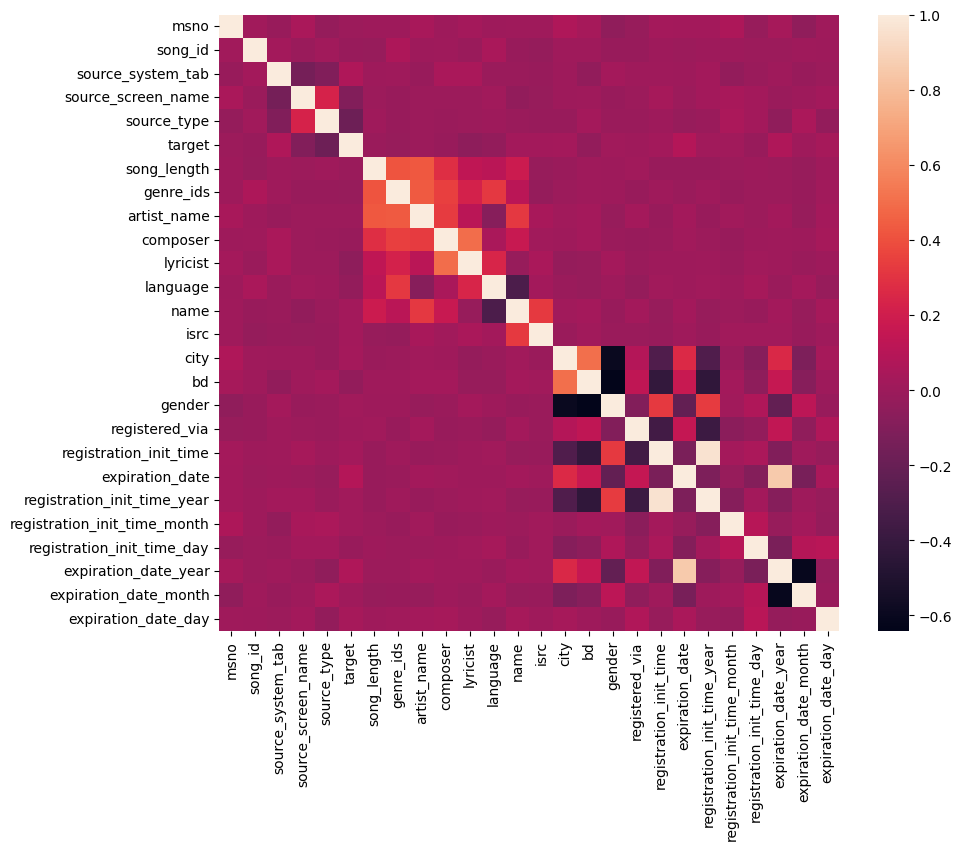

In [38]:
#Correlation matrix
plt.figure(figsize=[10,8])
sns.heatmap(music.corr())
plt.show()

In [39]:
music.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'lyricist', 'language', 'name', 'isrc', 'city', 'bd',
       'gender', 'registered_via', 'registration_init_time', 'expiration_date',
       'registration_init_time_year', 'registration_init_time_month',
       'registration_init_time_day', 'expiration_date_year',
       'expiration_date_month', 'expiration_date_day'],
      dtype='object')

**Building Model**

In [41]:
x = music.drop('target', axis = 1)
y = music['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

**Random Forest Classifier**

In [42]:
#with classweights
rf = RandomForestClassifier(
        n_estimators = 1000,
        class_weight={0: 1.0050505050505052, 1: 0.9949494949494948}
)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print(classification_report(y_test, pred))
print()
print("Accuracy :", accuracy_score(y_test, pred)*100)
print("ROC :", roc_auc_score(y_test, pred)*100)

              precision    recall  f1-score   support

           0       0.77      0.48      0.59       439
           1       0.87      0.96      0.91      1561

    accuracy                           0.85      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.85      0.84      2000


Accuracy : 85.39999999999999
ROC : 71.90005822446041


In [43]:
# without classweights
rf = RandomForestClassifier(
        n_estimators = 1000
)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print(classification_report(y_test, pred))
print()
print("Accuracy :", accuracy_score(y_test, pred)*100)
print("ROC :", roc_auc_score(y_test, pred)*100)

              precision    recall  f1-score   support

           0       0.77      0.49      0.60       439
           1       0.87      0.96      0.91      1561

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.84      2000


Accuracy : 85.55
ROC : 72.24174387366314
